

# Análisis Exploratorio de Datos para Predicción de Precios Inmobiliarios

### Descripción:
Este notebook realiza un análisis exploratorio de datos (EDA) de un conjunto de datos inmobiliarios con el objetivo de entender las relaciones entre las variables clave que afectan al precio de las propiedades. A través de técnicas de limpieza y transformación de datos, se eliminan valores nulos, se corrigen errores y se preparan las columnas para un análisis más profundo. Posteriormente, se analiza la distribución y la correlación entre variables, con un enfoque en las características que podrían tener un impacto directo en el valor de mercado de las propiedades.

El proyecto tiene como objetivo proporcionar una base sólida para desarrollar modelos predictivos de precios y descubrir patrones clave en el mercado inmobiliario. Se incluyen visualizaciones de distribuciones y relaciones entre variables para facilitar la toma de decisiones sobre la selección de características y el enfoque del análisis.are all supported.

### Cargamos los datos

In [0]:
# load 
file_location = "/FileStore/tables/csv_final.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20,_c21,_c22
Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,Street Address,City,Zip,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
https://www.zillow.com/homedetails/8198-Uphill-Rd-Joshua-Tree-CA-92252/111061445_zpid/,null,18000000,2435.0,Not specified,4,3,5470,null,SINGLE_FAMILY,8198 Uphill Rd,Joshua Tree,92252,CA,USA,AKGRE Inc,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/4757-Avenida-La-Espana-Daga-Joshua-Tree-CA-92252/2068547002_zpid/,223200.0,399990,1786.0,Not specified,2,3,1056,null,SINGLE_FAMILY,4757 Avenida La Espana Daga,Joshua Tree,92252,CA,USA,Champion Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/61018-Prescott-Trl-Joshua-Tree-CA-92252/17493731_zpid/,568947.0,575000,2300.0,Not specified,2,3,1577,null,SINGLE_FAMILY,61018 Prescott Trl,Joshua Tree,92252,CA,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/61875-Anaconda-Dr-Joshua-Tree-CA-92252/17494677_zpid/,851656.0,899000,4798.0,Not specified,2,3,1434,null,SINGLE_FAMILY,61875 Anaconda Dr,Joshua Tree,92252,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/61879-Petunia-Dr-Joshua-Tree-CA-92252/17500696_zpid/,null,369900,1825.0,Not specified,1,3,1040,null,SINGLE_FAMILY,61879 Petunia Dr,Joshua Tree,92252,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/7201-Demesne-Rd-Joshua-Tree-CA-92252/89163682_zpid/,388300.0,520000,2300.0,Not specified,2,4,1527,null,SINGLE_FAMILY,7201 Demesne Rd,Joshua Tree,92252,CA,USA,NextHome Select Realtors,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/61854-Crest-Cir-Joshua-Tree-CA-92252/17500217_zpid/,392179.0,399000,1897.0,Not specified,2,3,1100,null,SINGLE_FAMILY,61854 Crest Cir,Joshua Tree,92252,CA,USA,REAL BROKERAGE TECHNOLOGIES,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/61635-Adobe-Dr-Joshua-Tree-CA-92252/17499740_zpid/,361925.0,369000,1914.0,Not specified,2,3,1026,null,SINGLE_FAMILY,61635 Adobe Dr,Joshua Tree,92252,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
https://www.zillow.com/homedetails/60217-Sunny-Sands-Dr-Joshua-Tree-CA-92252/79553621_zpid/,628494.0,650000,2499.0,Not specified,2,3,1488,null,SINGLE_FAMILY,60217 Sunny Sands Dr,Joshua Tree,92252,CA,USA,BRAXTON REAL ESTATE,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [0]:
df.show()

+--------------------+---------+--------+--------------+--------------+---------+--------+-----------+--------+-------------+--------------------+-----------+-----+-----+-------+--------------------+------------+---------+---------+-------------+-----------------+----------------+----------+
|                 _c0|      _c1|     _c2|           _c3|           _c4|      _c5|     _c6|        _c7|     _c8|          _c9|                _c10|       _c11| _c12| _c13|   _c14|                _c15|        _c16|     _c17|     _c18|         _c19|             _c20|            _c21|      _c22|
+--------------------+---------+--------+--------------+--------------+---------+--------+-----------+--------+-------------+--------------------+-----------+-----+-----+-------+--------------------+------------+---------+---------+-------------+-----------------+----------------+----------+
|                 Url|Zestimate|   Price|Rent Zestimate|Days On Zillow|Bathrooms|Bedrooms|Living Area|Lot Size|    Home T

### Modificamos y limpiamos los datos

In [0]:
# Renombramos las columnas para trabajar con mayor claridad
df = df.withColumnRenamed("_c0", "URL") \
       .withColumnRenamed("_c1", "Zestimate") \
       .withColumnRenamed("_c2", "Price") \
       .withColumnRenamed("_c3", "Rent Zestimate") \
       .withColumnRenamed("_c4", "Days On Zillow") \
       .withColumnRenamed("_c5", "Bathrooms") \
       .withColumnRenamed("_c6", "Bedrooms") \
       .withColumnRenamed("_c7", "Living Area") \
       .withColumnRenamed("_c8", "Lot Size") \
       .withColumnRenamed("_c9", "Home Type") \
       .withColumnRenamed("_c10", "Street Address") \
       .withColumnRenamed("_c11", "City") \
       .withColumnRenamed("_c12", "Zip") \
       .withColumnRenamed("_c13", "State") \
       .withColumnRenamed("_c14", "Country") \
       .withColumnRenamed("_c15", "Broker Name") \
       .withColumnRenamed("_c16", "Has 3D Model") \
       .withColumnRenamed("_c17", "Has Image") \
       .withColumnRenamed("_c18", "Has Video") \
       .withColumnRenamed("_c19", "isZillowOwned") \
       .withColumnRenamed("_c20", "sgapt") \
       .withColumnRenamed("_c21", "statusText") \
       .withColumnRenamed("_c22", "statusType")


In [0]:
from pyspark.sql.functions import count, when, col

# Verificar valores nulos por columna
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---+---------+-----+--------------+--------------+---------+--------+-----------+--------+---------+--------------+----+---+-----+-------+-----------+------------+---------+---------+-------------+-----+----------+----------+
|URL|Zestimate|Price|Rent Zestimate|Days On Zillow|Bathrooms|Bedrooms|Living Area|Lot Size|Home Type|Street Address|City|Zip|State|Country|Broker Name|Has 3D Model|Has Image|Has Video|isZillowOwned|sgapt|statusText|statusType|
+---+---------+-----+--------------+--------------+---------+--------+-----------+--------+---------+--------------+----+---+-----+-------+-----------+------------+---------+---------+-------------+-----+----------+----------+
|  0|       32|    0|            23|             0|        0|       0|          0|     353|        0|             0|   0|  0|    0|      0|         23|           0|        0|        0|            0|    0|         0|         0|
+---+---------+-----+--------------+--------------+---------+--------+-----------+--------+-

In [0]:
# Nos aseguramos que las columnas númericas sean realmente númericas
from pyspark.sql.functions import col

df = df.withColumn("Price", col("Price").cast("float")) \
       .withColumn("Zestimate", col("Zestimate").cast("float")) \
       .withColumn("Rent Zestimate", col("Rent Zestimate").cast("float")) \
       .withColumn("Living Area", col("Living Area").cast("float")) \
       .withColumn("Lot Size", col("Lot Size").cast("float"))


In [0]:
# Eliminamos datos duplicados
df = df.dropDuplicates(["URL"])

In [0]:
# Obtenemos estadísticas básicas
# Estadísticas descriptivas
df.describe().show()


+-------+--------------------+-----------------+------------------+------------------+--------------+------------------+------------------+------------------+--------+-------------+--------------+-------------+------------------+-----+-------+--------------------+------------+---------+---------+-------------+-----------------+----------+----------+
|summary|                 URL|        Zestimate|             Price|    Rent Zestimate|Days On Zillow|         Bathrooms|          Bedrooms|       Living Area|Lot Size|    Home Type|Street Address|         City|               Zip|State|Country|         Broker Name|Has 3D Model|Has Image|Has Video|isZillowOwned|            sgapt|statusText|statusType|
+-------+--------------------+-----------------+------------------+------------------+--------------+------------------+------------------+------------------+--------+-------------+--------------+-------------+------------------+-----+-------+--------------------+------------+---------+---------

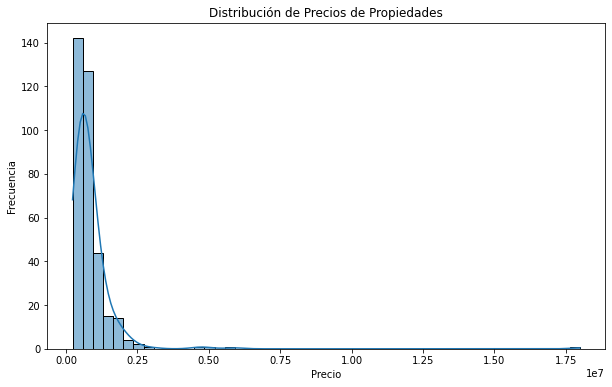

In [0]:
# Vamos a generar algunas visualizaciones enfocandonos en las variables Price, Zestimate, Rent Zestimate, Living Area... para ver si hay patrones o valores atípicos
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos a Pandas para poder graficar
df_pandas = df.toPandas()

# Graficamos la distribución del precio
plt.figure(figsize=(10,6))
sns.histplot(df_pandas['Price'], bins=50, kde=True)
plt.title('Distribución de Precios de Propiedades')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


1. Análisis de la distribución de los precios (Price) y Zestimate

Primero, analicemos la distribución de las variables más importantes, como el precio real (Price) y el precio estimado (Zestimate). Al compararlas, podemos observar las posibles diferencias y cómo se distribuyen.

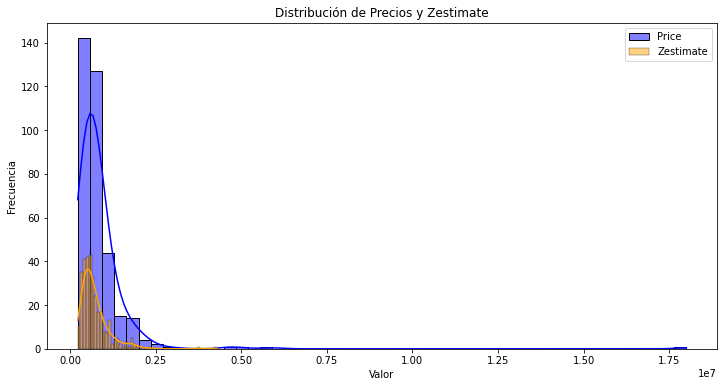

In [0]:
# Graficamos las distribuciones de Price y Zestimate
plt.figure(figsize=(12,6))
sns.histplot(df_pandas['Price'], color='blue', label='Price', kde=True, bins=50)
sns.histplot(df_pandas['Zestimate'], color='orange', label='Zestimate', kde=True, bins=50)
plt.title('Distribución de Precios y Zestimate')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

2. Comparación entre Price y Zestimate

Calculamos la diferencia entre el precio real (Price) y el precio estimado (Zestimate) para ver cuán precisos son los valores de Zillow. Esto puede ser un punto importante en el análisis.

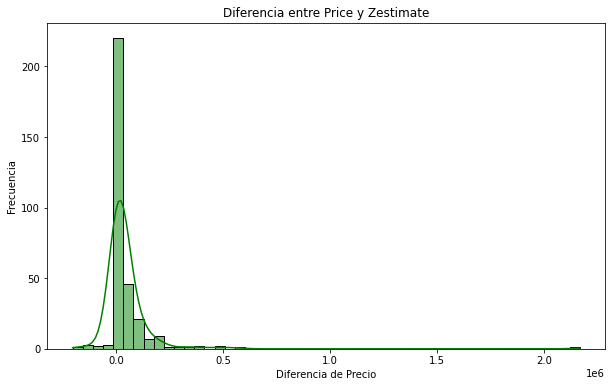

In [0]:
# Crear una nueva columna con la diferencia entre Price y Zestimate
df_pandas['Price_Zestimate_Diff'] = df_pandas['Price'] - df_pandas['Zestimate']

# Graficamos la diferencia
plt.figure(figsize=(10,6))
sns.histplot(df_pandas['Price_Zestimate_Diff'], bins=50, kde=True, color='green')
plt.title('Diferencia entre Price y Zestimate')
plt.xlabel('Diferencia de Precio')
plt.ylabel('Frecuencia')
plt.show()

3. Análisis de correlación entre las variables numéricas

Para comprender mejor cómo se relacionan las variables numéricas entre sí, podemos calcular y visualizar las correlaciones. Esto es especialmente útil si tienes varias variables como el número de baños, dormitorios, área, etc., ya que podríamos ver si existe alguna relación fuerte con el precio o el Zestimate.

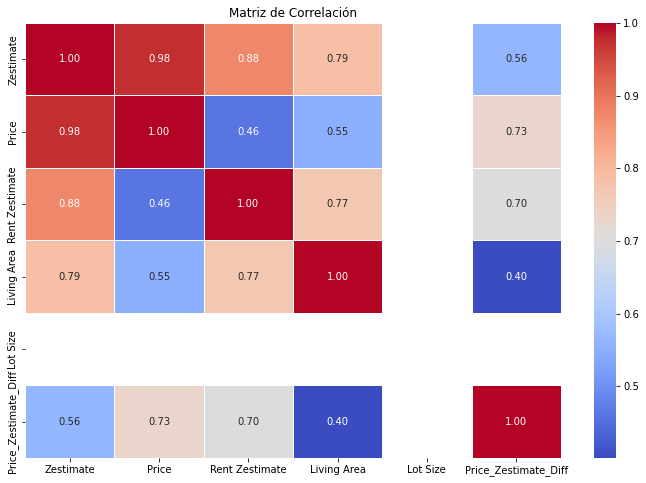

In [0]:
# Reemplazar valores 0 por NaN en las columnas numéricas
df_clean = df_clean.replace(0, float('nan'))

# Ahora podemos calcular la correlación
correlation_matrix = df_clean.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

4. Exploración de variables categóricas

Las variables como Home Type, City, State, Broker Name, entre otras, podrían tener un impacto significativo en los precios o en la estimación de los valores. Un análisis de estas variables también puede ser útil.


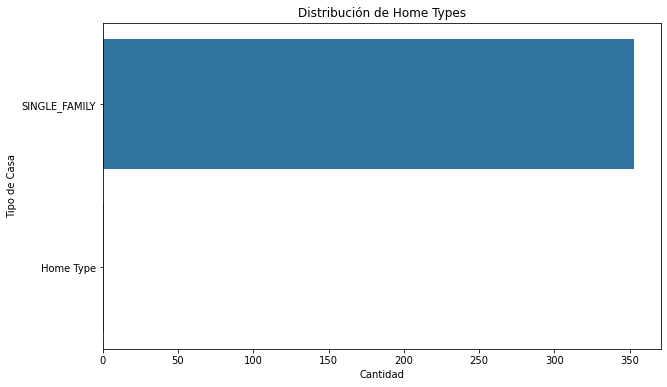

In [0]:
# Graficar la distribución de los tipos de casa
plt.figure(figsize=(10,6))
sns.countplot(y='Home Type', data=df_pandas, order=df_pandas['Home Type'].value_counts().index)
plt.title('Distribución de Home Types')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Casa')
plt.show()

5. Exploración de propiedades con valores extremos (outliers)

Identificar propiedades con precios o estimaciones muy altas o bajas puede ser útil para el análisis.

In [0]:
# Filtrar propiedades con precios muy altos o muy bajos
high_price = df_pandas[df_pandas['Price'] > df_pandas['Price'].quantile(0.95)]
low_price = df_pandas[df_pandas['Price'] < df_pandas['Price'].quantile(0.05)]

# Visualizar propiedades con precios extremos
print("Propiedades con precios altos:")
print(high_price[['URL', 'Price', 'Zestimate']])

print("Propiedades con precios bajos:")
print(low_price[['URL', 'Price', 'Zestimate']])

Propiedades con precios altos:
                                                   URL       Price  Zestimate
2    https://www.zillow.com/homedetails/0-Sunfair-R...   1800000.0        NaN
6    https://www.zillow.com/homedetails/1027-Herita...   2289000.0  1804200.0
7    https://www.zillow.com/homedetails/1033-Herita...   1950000.0  1771560.0
14   https://www.zillow.com/homedetails/112-Eagle-D...   2100000.0  1604300.0
37   https://www.zillow.com/homedetails/1640-Shenan...   2099999.0  1918200.0
39   https://www.zillow.com/homedetails/1658-Tuolum...   1900000.0  1799652.0
46   https://www.zillow.com/homedetails/205-Lagunit...   5895000.0  3729600.0
50   https://www.zillow.com/homedetails/251-Eagle-D...   1880000.0        NaN
60   https://www.zillow.com/homedetails/3382-Center...   2100000.0        NaN
73   https://www.zillow.com/homedetails/38969-N-Bay...   2399000.0  2158173.0
78   https://www.zillow.com/homedetails/39363-Auror...   4650000.0        NaN
96   https://www.zillow.com/homed

6. Identificación de tendencias geográficas

Si tienes la columna City, podrías investigar si existen tendencias geográficas en los precios o estimaciones. Esto puede ayudar a segmentar las propiedades según su ubicación.

Por ejemplo, podemos analizar el precio promedio por ciudad.

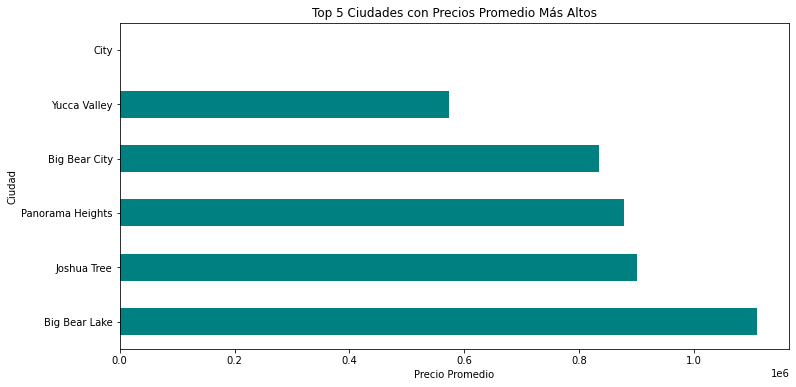

In [0]:
# Calcular el precio promedio por ciudad
city_avg_price = df_pandas.groupby('City')['Price'].mean().sort_values(ascending=False)

# Visualizar las 10 ciudades con los precios más altos
plt.figure(figsize=(12,6))
city_avg_price.head(10).plot(kind='barh', color='teal')
plt.title('Top 5 Ciudades con Precios Promedio Más Altos')
plt.xlabel('Precio Promedio')
plt.ylabel('Ciudad')
plt.show()